<img src="./assets/Semana 13 - Reprograma Mariana Pires.png"/>
<h2 style='font-family: Lucida Console; text-align:center;'>Descrição:</h2>
<p style="text-align: justify">Este projeto visa analisar um dataset e compilar informações detalhadas sobre o Índice de Desigualdade de Gênero (Gender Inequality Index - GII) em todo mundo. O GII é uma métrica ampla que avalia as disparidades de gênero em áreas críticas, incluindo saúde, educação e oportunidade econômica.</p>
<ol><p style="text-align: justify">Este banco de dados inclui os seguintes indicadores:</p>
<li><b>Country:</b> o pais ao qual os dados se referem.</li>
<li><b>Human Development:</b> o nível de desenvolvimento humano do país.</li>
<li><b>GII:</b> a pontuação do Índice de Desigualdade de Gênero.</li>
<li><b>Rank:</b> a posição do país no ranking global de desigualdade de gênero.</li>
<li><b>Maternal Mortality:</b> a taxa de mortalidade materna, que funciona como indicador crítico de saúde feminina. Foi calculado um ratio de mortes por 100,000 nascimentos.</li>
<li><b>Adolescent Birth Rate:</b> a taxa de natalidade na adolescência, fator que afeta saúde, oportunidades econômicas e reflete na educação.</li>
<li><b>Seats in Parliament:</b> a representação feminina no parlamento em porcentagem, um fator de igualdade política.</li>
<li><b>Female Secondary Education:</b> a participação feminina no ensino médio. Em porcentagem e incluído apenas mulheres de 25 anos e mais velhas.</li>
<li><b>Male Secondary Education:</b> a participação masculina no ensino médio. Em porcentagem e incluído apenas homens de 25 anos e mais velhos.</li>
<li><b>Female Labor Force Participation:</b> a participação feminina no mercado de trabalho. Em porcentagem, incluso idades de 15 para cima.</li>
<li><b>Male Labor Force Participation:</b> a participação masculina no mercado de trabalho.Em porcentagem, incluso idades de 15 para cima.</li></ol>

<h2 style='font-family: Lucida Console; text-align:center;'>Objetivos do projeto:</h2>
<ul><li style="text-align: justify">Traduzir os dados para aumentar a sua acessibilidade.</li>
<li style="text-align: justify">Limpar os dados do dataset para facilitar a consulta.</li>
<li style="text-align: justify">Facilitar a criação de insights através de visualizações com o <i>Pandas</i> e <i>MatPlotLib</i>.</li>
<li style="text-align: justify">Avaliar a disparidade de gênero em áreas críticas (saúde, educação e oportunidades econômicas) a nível global.</li></ul>

<h2 style='font-family: Lucida Console; text-align:center;'>Fonte de dados:</h2>
<p style="text-align: justify">Os dados utilizados foram obtidos através do Kaggle e fazem parte do conjunto de dados públicos do GII. É possível encontrar informações detalhadas sobre o conjunto de dados <a src="https://www.kaggle.com/datasets/gianinamariapetrascu/gender-inequality-index" target="_blank">aqui</a>.</p>


In [13]:
#Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Importando o arquivo Gender_Inequality_Index.csv para um dataframe
df = pd.read_csv("./raw_data/Gender_Inequality_Index.csv")

<h2 style='font-family: Lucida Console; text-align:center;'>Limpeza dos dados:</h2>

In [6]:
#Visualizando o início do dataframe
df.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


<p style="text-align:justify">A primeira etapa ao lidar com um conjunto de dados é a compreensão de sua estrutura e conteúdo.</p>
<p style="text-align:justify">Ao exibir as primeiras linhas do DataFrame, já é possível identificar que os dados estão em inglês e alguns de seus valores estão nulos. Sendo assim, a proxima ação limpar os dados nulos para garantir que apenas informações válidas estejam presentes nas colunas e, após isto, traduzir as colunas e campos.</p>

In [8]:
#Removendo todas as linhas com NaN como valor em qualquer coluna 
df = df.dropna()

In [22]:
#Tradução das colunas
df = df.rename(columns={
'Country':'País',
'Human_development': 'Desenvolvimento Humano',
'GII': 'IDG',
'Maternal_mortality': 'Mortalidade Materna',
'Adolescent_birth_rate': 'Taxa de Gravidez na Adolescência',
'Seats_parliament': '% Assentos Femininos no Parlamento',
'F_secondary_educ': '% Mulheres com Educação Secundária',
'M_secondary_educ': '% Homens com Educação Secundária',
'F_Labour_force': '% Mulheres no Mercado de Trabalho',
'M_Labour_force': '% Homens no Mercado de Trabalho'
})

In [12]:
#Tradução dos campos
paises_traducao = {'Switzerland': 'Suiça', 'Norway': 'Noruega','Iceland': 'Islândia','Australia': 'Austrália','Denmark': 'Dinamarca','Sweden': 'Suécia','Ireland': 'Irlanda','Germany': 'Alemanha','Netherlands': 'Países Baixos','Finland': 'Finlândia','Luxembourg': 'Luxemburgo','United Kingdom': 'Reino Unido','Japan': 'Japão','South Korea': 'Coreia do Sul','Slovenia': 'Eslovênia','Austria': 'Áustria','Spain': 'Espanha','France': 'França','Italy': 'Itália','Estonia': 'Estônia','Czechia': 'Chéquia','Greece': 'Grécia','Poland': 'Polônia','Lithuania': 'Lituânia','Portugal': 'Portugal','Latvia': 'Letônia','Croatia': 'Croácia','Chile': 'Chile','Slovakia': 'Eslováquia','Hungary': 'Hungria','Russia': 'Rússia','Romania': 'Romênia','Bahrain': 'Bahrein','Malta': 'Malta','Argentina': 'Argentina','Turkey': 'Turquia','Montenegro': 'Montenegro','Brunei Darussalam': 'Brunei','Kazakhstan': 'Cazaquistão','Trinidad and Tobago': 'Trinidad e Tobago','Costa Rica': 'Costa Rica','Uruguay': 'Uruguai','Belarus': 'Bielorrússia','Panama': 'Panamá','Malaysia': 'Malásia','Georgia': 'Geórgia','Mauritius': 'Maurícia','Serbia': 'Sérvia','Thailand': 'Tailândia','Albania': 'Albânia','Bulgaria': 'Bulgária','Barbados': 'Barbados','Sri Lanka': 'Sri Lanka','Bosnia and Herzegovina': 'Bósnia e Herzegovina','Iran': 'Irã','Ukraine': 'Ucrânia','North Macedonia': 'Macedônia do Norte','China': 'China','Dominican Republic': 'República Dominicana','Moldova': 'Moldávia','Cuba': 'Cuba','Peru': 'Peru','Armenia': 'Armênia','Mexico': 'México','Brazil': 'Brasil','Colombia': 'Colômbia','Saint Vincent and the Grenadines': 'São Vicente e Granadinas','Maldives': 'Maldivas','Algeria': 'Argélia','Azerbaijan': 'Azerbaijão','Turkmenistan': 'Turcomenistão','Ecuador': 'Equador','Mongolia': 'Mongólia','Egypt': 'Egito','Tunisia': 'Tunísia','Fiji': 'Fiji','Suriname': 'Suriname','Uzbekistan': 'Uzbequistão','Jordan': 'Jordânia','Libya': 'Líbia','Paraguay': 'Paraguai',"Côte d'Ivoire": 'Costa do Marfim','Tanzania': 'Tanzânia','Pakistan': 'Paquistão','Togo': 'Togo','Haiti': 'Haiti','Nigeria': 'Nigéria','Rwanda': 'Ruanda','Benin': 'Benin','Uganda': 'Uganda','Lesotho': 'Lesoto','Senegal': 'Senegal','Sudan': 'Sudão','Madagascar': 'Madagáscar','Gambia': 'Gâmbia','Ethiopia': 'Etiópia','Guinea-Bissau': 'Guiné-Bissau','Liberia': 'Libéria','Central African Republic': 'República Centro-Africana','Niger': 'Níger','Chad': 'Chade','South Sudan': 'Sudão do Sul','Sierra Leone': 'Serra Leoa','Guinea': 'Guiné','Mozambique': 'Moçambique','Mali': 'Mali','Burundi': 'Burundi','Afghanistan': 'Afeganistão'}

df['País'] = df['País'].replace(paises_traducao)

desenvolv_traducao = {'Very high': 'Muito alto','High': 'Alto', 'Medium': 'Médio', 'Low': 'Baixo'}

df['Desenvolvimento Humano'] = df['Desenvolvimento Humano'].replace(desenvolv_traducao)

<h2 style='font-family: Lucida Console; text-align:center;'>Análise dos dados:</h2>

<p style='text-align: justify'>Como divulgado anteriormente, esse DataFrame possui diversos dados interessantes para recolher insights. Iremos responder algumas perguntas através da análise de dados utilizando as bibliotecas Panda e Numpy a seguir.</p>

<h3 style='font-family: Lucida Console; font-weight: 800; text-align: center;'>Quais são os países com maior e menor desigualdade de gênero?</h3>

In [31]:
pais_maior_idg= df.loc[df['IDG'].idxmax()]['País']
maior_idg = df['IDG'].max()
print(f"País com o maior Índice de Desigualdade de Gênero: {pais_maior_idg} (IDG: {maior_idg})")

País com o maior Índice de Desigualdade de Gênero: Yemen (IDG: 0.82)


In [29]:
pais_menor_idg= df.loc[df['IDG'].idxmin()]['País']
menor_idg = df['IDG'].min()
print(f"País com o menor Índice de Desigualdade de Gênero: {pais_menor_idg} (IDG: {menor_idg})")

País com o menor Índice de Desigualdade de Gênero: Dinamarca (IDG: 0.013)


<h3 style='font-family: Lucida Console; font-weight: 800; text-align: center'>Quais são os países onde há maior porcentagem de mulheres no Parlamento?</h3>

In [36]:
pais_maior_assentos= df.loc[df['% Assentos Femininos no Parlamento'].idxmax()]['País']
maior_assentos = df['% Assentos Femininos no Parlamento'].max()
print(f"País com o maior número de mulheres no parlamento: {pais_maior_assentos} (Porcentagem: {maior_assentos}%)")

País com o maior número de mulheres no parlamento: Ruanda (Porcentagem: 55.7%)


<h3 style='font-family: Lucida Console; font-weight: 800;text-align: center;'>Como o Brasil se compara?</h3>

In [40]:
brasil_data = df[df['País'] == 'Brasil']
brasil_assentos = brasil_data['% Assentos Femininos no Parlamento'].values[0]
brasil_idg = brasil_data['IDG'].values[0]
print(f"O Brasil tem {brasil_assentos}% de mulheres no parlamento e um Índice de Desigualdade de Gênero de {brasil_idg}.")

O Brasil tem 14.8% de mulheres no parlamento e um Índice de Desigualdade de Gênero de 0.39.


<h3 style='font-family: Lucida Console; font-weight: 800;text-align: center;'>Qual a média do Índice de Desigualdade de Gênero?</h3>

<p style='text-align: justify'>Ao criar uma média, podemos comparar os países e entender se estão acima ou abaixo da média mundial.</p>

In [43]:
media_idg = df['IDG'].mean()
print(f"Média do Índice de Desigualgade de Gênero: {media_idg:.2f}")

Média do Índice de Desigualgade de Gênero: 0.34


<h2 style='font-family: Lucida Console; text-align:center;'>Visualização de dados:</h2>

<p style='text-align: justify'>Através da biblioteca MatPlotLib podemos trazer algumas observações interessantes de forma visual e contribuir para a criação de novos insights. É o que faremos a seguir:</p>

<h3 style='font-family: Lucida Console; font-weight: 800;text-align: center;'>Há correlação entre IDG e Índice de Desenvolvimento Humano?</h3>

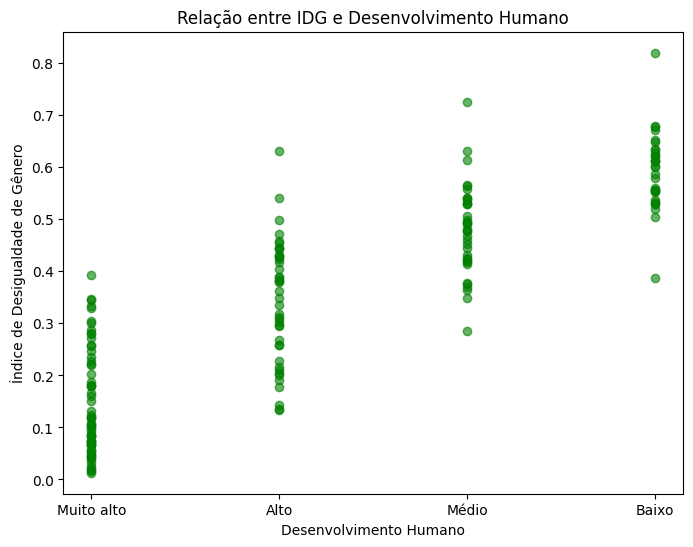

In [44]:
desenvolvimento = df['Desenvolvimento Humano']
idg = df['IDG']
paises = df['País']

plt.figure(figsize=(8, 6)) #Essas linhas significam que a largura do gráfico será de 8in e a altura será de 6in.

plt.scatter(desenvolvimento, idg, c='green', alpha=0.6)  #c= color, alpha= transparência. Nesse caso, eu experimentei um pouco e descobri que é bom deixar um poucio transparente pra conseguir ver os pontos sobressalentes  
plt.xlabel('Desenvolvimento Humano')
plt.ylabel('Índice de Desigualdade de Gênero')
plt.title('Relação entre IDG e Desenvolvimento Humano')
plt.show()

<h3 style='font-family: Lucida Console; font-weight: 800;text-align: center;'>Como se dá a distribuição mundial do Índice de Desigualdade de Gênero?</h3>

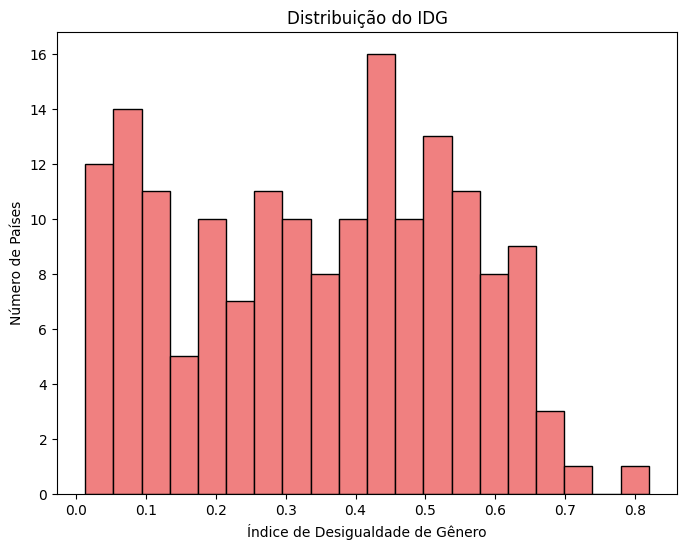

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(idg, bins=20, color='lightcoral', edgecolor='black') #bins é o número de barras
plt.xlabel('Índice de Desigualdade de Gênero')
plt.ylabel('Número de Países')
plt.title('Distribuição do IDG')
plt.show()

<h3 style='font-family: Lucida Console; font-weight: 800;text-align: center;'>Como é visualizada a porcentagem de mulheres no mercado de trabalho quando comparada com a de homens?</h3>

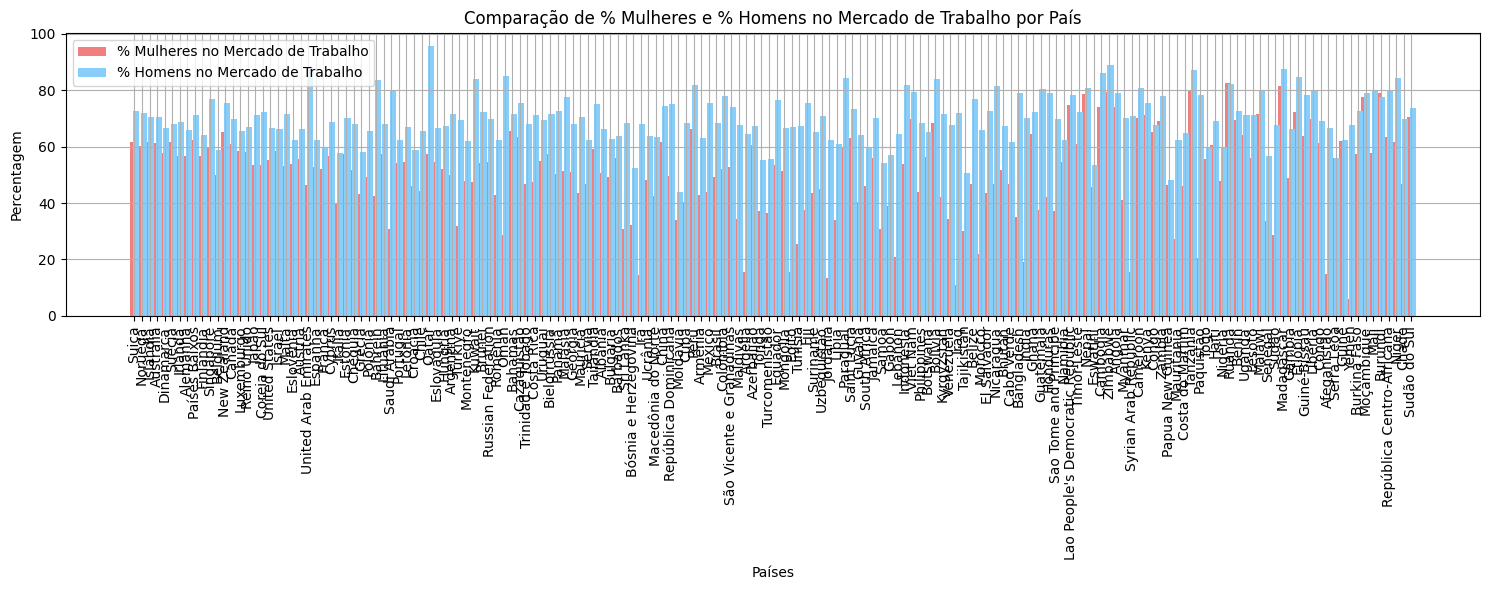

In [53]:
mulheres_mercado = df['% Mulheres no Mercado de Trabalho']
homens_mercado = df['% Homens no Mercado de Trabalho']
paises = df['País']
index = range(len(paises))
plt.figure(figsize=(15, 6))
plt.bar(index, mulheres_mercado, label='% Mulheres no Mercado de Trabalho', color='lightcoral')
plt.bar([i + 0.4 for i in index], homens_mercado, label='% Homens no Mercado de Trabalho', color='lightskyblue') # A fórmula no início existe para evitar overlapping entre dados

plt.xlabel('Países')
plt.ylabel('Percentagem')
plt.title('Comparação de % Mulheres e % Homens no Mercado de Trabalho por País')
plt.xticks([i + 0.2 for i in index], paises, rotation=90)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<h3 style='font-family: Lucida Console; font-weight: 800;text-align: center;'>Há correlação entre gravidez na adolescência e mortalidade materna?</h3>

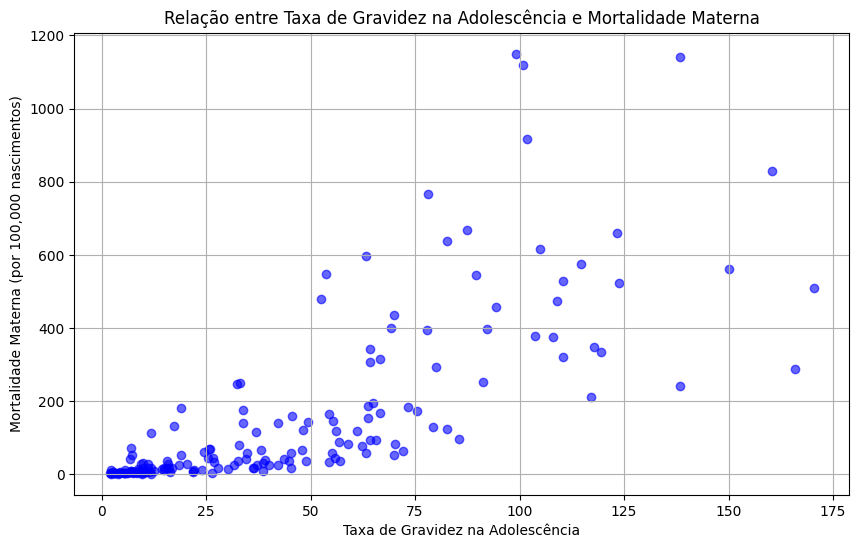

In [55]:
gravidez_adolescencia = df['Taxa de Gravidez na Adolescência']
mortalidade_materna = df['Mortalidade Materna']

plt.figure(figsize=(10, 6))
plt.scatter(gravidez_adolescencia, mortalidade_materna, c='blue', alpha=0.6)
plt.xlabel('Taxa de Gravidez na Adolescência')
plt.ylabel('Mortalidade Materna (por 100,000 nascimentos)')
plt.title('Relação entre Taxa de Gravidez na Adolescência e Mortalidade Materna')
plt.grid(True) 

plt.show()